# this a markdown


In [875]:
import numpy as np
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

# Part 1

## Part 1.1

### Import from the csv file

In [876]:
data = genfromtxt('Q1.csv', delimiter=',')

data_feature_name = ['Oral','Written','Acceptance']



In [877]:
df = pd.DataFrame(data,columns = data_feature_name)

In [878]:
df.Acceptance


0     0.0
1     0.0
2     0.0
3     1.0
4     1.0
     ... 
95    1.0
96    1.0
97    1.0
98    1.0
99    1.0
Name: Acceptance, Length: 100, dtype: float64

### 1.1 Create Train and test data (70 of the data belongs to Training)

In [879]:
X = df.drop(['Acceptance'],axis = 'columns')
Y = df['Acceptance']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)


Text(0, 0.5, 'Written')

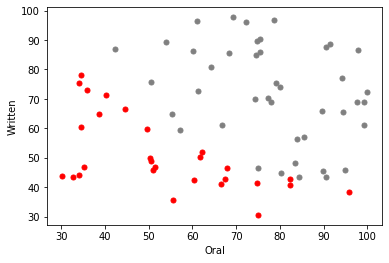

In [880]:
df_train = pd.DataFrame(X_train,columns = data_feature_name[:2])
df_train['Acceptance'] = Y_train

plt.scatter(df_train[df_train.Acceptance == 0]['Oral'], df_train[df_train.Acceptance == 0]['Written'],color = 'red', marker = '.' , s = 100)
plt.scatter(df_train[df_train.Acceptance == 1]['Oral'], df_train[df_train.Acceptance == 1]['Written'],color = 'gray', marker = '.' , s = 100)

plt.xlabel('Oral')
plt.ylabel('Written')

### 1.2

In [881]:
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
print(clf.score(X_train,Y_train))
print(clf.score(X_test,Y_test))

0.9571428571428572
0.8


Text(0, 0.5, 'Written')

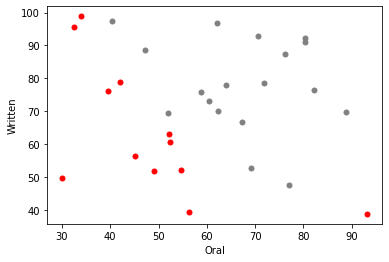

In [882]:
df_test = pd.DataFrame(X_test,columns = data_feature_name[:2])
df_test['Acceptance'] = Y_test



plt.scatter(df_test[df_test.Acceptance == 0]['Oral'], df_test[df_test.Acceptance == 0]['Written'],color = 'red', marker = '.' , s = 100)
plt.scatter(df_test[df_test.Acceptance == 1]['Oral'], df_test[df_test.Acceptance == 1]['Written'],color = 'gray', marker = '.' , s = 100)

plt.xlabel('Oral')
plt.ylabel('Written')

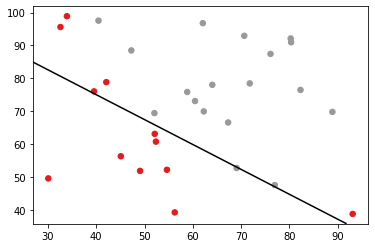

In [883]:
X = df_test.values
plt.scatter(X[:,0],X[:,1],c=Y_test,s=30,cmap=plt.cm.Set1)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)

YY, XX = np.meshgrid(yy,xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX,YY,Z,colors = 'k',levels=[0])
plt.show()



## 2

### 2.1

In [884]:
data = genfromtxt('Q2.csv', delimiter=',')

data_feature_name = ['f1','f2','Acceptance']
df = pd.DataFrame(data,columns = data_feature_name)

In [885]:
X = df.drop(['Acceptance'],axis = 'columns')
Y = df['Acceptance']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

Text(0, 0.5, 'f2')

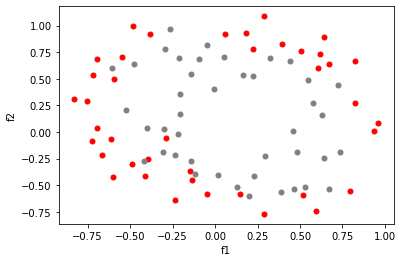

In [886]:
df_train = pd.DataFrame(X_train,columns = data_feature_name[:2])
df_train['Acceptance'] = Y_train

plt.scatter(df_train[df_train.Acceptance == 0]['f1'], df_train[df_train.Acceptance == 0]['f2'],color = 'red', marker = '.' , s = 100)
plt.scatter(df_train[df_train.Acceptance == 1]['f1'], df_train[df_train.Acceptance == 1]['f2'],color = 'gray', marker = '.' , s = 100)

plt.xlabel('f1')
plt.ylabel('f2')

### 2.2

In [887]:
trans = PolynomialFeatures(degree=4)
X_new = trans.fit_transform(X)
#print(X_new[0])
#print(X_new.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y,test_size=0.3)


clf = LogisticRegression(random_state=0).fit(X_train, Y_train)
print(f"Train: {clf.score(X_train,Y_train)}")
print(f"Test: {clf.score(X_test,Y_test)}")

Train: 0.8048780487804879
Test: 0.8055555555555556


### 2.3  

In [888]:
clf = LogisticRegression(random_state=0,C=5600).fit(X_train, Y_train)
print(f"Train: {clf.score(X_train,Y_train)}")
print(f"Test: {clf.score(X_test,Y_test)}")

Train: 0.7926829268292683
Test: 0.8611111111111112


C:\Users\N\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 3

### 3.1

In [889]:
data = genfromtxt('Q3_1.csv', delimiter=',')

data_feature_name = ['f1','f2','Acceptance']
df = pd.DataFrame(data,columns = data_feature_name)

In [890]:
X = df.drop(['Acceptance'],axis = 'columns')
Y = df['Acceptance']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

Text(0, 0.5, 'f2')

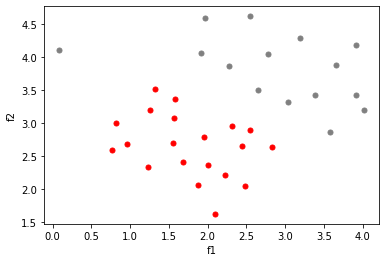

In [891]:
df_train = pd.DataFrame(X_train,columns = data_feature_name[:2])
df_train['Acceptance'] = Y_train

df_test = pd.DataFrame(X_test,columns = data_feature_name[:2])
df_test['Acceptance'] = Y_test


plt.scatter(df_train[df_train.Acceptance == 0]['f1'], df_train[df_train.Acceptance == 0]['f2'],color = 'red', marker = '.' , s = 100)
plt.scatter(df_train[df_train.Acceptance == 1]['f1'], df_train[df_train.Acceptance == 1]['f2'],color = 'gray', marker = '.' , s = 100)

plt.xlabel('f1')
plt.ylabel('f2')

In [892]:
def svm_plot(df_test,Y_test, model):
    X = df_test.values
    plt.scatter(X[:,0],X[:,1],c=Y_test,s=30,cmap=plt.cm.Set1)
    ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0],xlim[1],30)
    yy = np.linspace(ylim[0],ylim[1],30)

    YY, XX = np.meshgrid(yy,xx)

    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX,YY,Z,colors = 'k',levels=[-1,0,1],alpha = 0.5,linestyles = ['--','-','--'])
    ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s = 100, linewidths=1,facecolors='none',edgecolors='black')
    plt.show()


0.9714285714285714


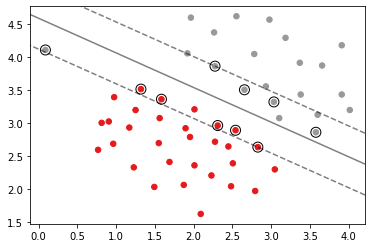

In [893]:
model = SVC(kernel='linear',C = 1)
model.fit(X_train,Y_train)
print(model.score(X_train,Y_train))
svm_plot(df,Y, model)